In [1]:
# loading libraries for data manipulation
import numpy as np
import pandas as pd

# loading libraries for data visualization
import matplotlib.pyplot as plt
from plotnine import *

# import tensorflow and keras packages
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

We will load the MNIST data again. This time, we will change the labels to be in a more standardized form. 

In [2]:
# Load MNIST data from keras.datasets
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

X_train_mnist = X_train_mnist.reshape(-1, 28*28).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28*28).astype('float32') / 255.0

# Convert y labels to one-hot encoded vectors
y_train_mnist = keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, num_classes=10)



Regularization techniques ensure that a deep neural network is generalized - avoids overfitting in particular. Some techniques we can employ:
- Penalization
- Dropout
- Batch Normalization
- Early Stopping

Let's first build a deep neural network to classify digits without any regularization

In [5]:
model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',input_shape=(784,)),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]) #keras.optimizers.SGD(0.01)

history_no_reg = model.fit(X_train_mnist,y_train_mnist,
                           epochs=20,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8763 - loss: 0.4570 - val_accuracy: 0.8783 - val_loss: 0.6540
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8196 - loss: 1.7362 - val_accuracy: 0.8154 - val_loss: 2.6513
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7978 - loss: 4.4063 - val_accuracy: 0.8103 - val_loss: 5.9729
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7947 - loss: 7.6011 - val_accuracy: 0.7882 - val_loss: 8.7323
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7850 - loss: 12.4754 - val_accuracy: 0.7953 - val_loss: 11.4699
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7892 - loss: 15.9158 - val_accuracy: 0.7946 - val_loss: 19.4028
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7823 - loss: 22.9389 - val_accuracy: 0.8293 - val_loss: 17.2359
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7837 - loss: 26.6126 - v

Let's introduce L2 weight regularization. This is theoretically a weight decay which will ensure that weights remain small and not one neuron influences inferences. 

In [6]:
model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(784,)),
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history_l2_reg = model.fit(X_train_mnist,y_train_mnist,
                           epochs=20,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8699 - loss: 0.8775 - val_accuracy: 0.8499 - val_loss: 1.2431
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8231 - loss: 3.0895 - val_accuracy: 0.7554 - val_loss: 6.4429
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7846 - loss: 9.8796 - val_accuracy: 0.8161 - val_loss: 12.7515
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7838 - loss: 18.5462 - val_accuracy: 0.7768 - val_loss: 24.0727
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7835 - loss: 29.5196 - val_accuracy: 0.7726 - val_loss: 40.6439
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7762 - loss: 43.1960 - val_accuracy: 0.7407 - val_loss: 55.6213
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7745 - loss: 60.2336 - val_accuracy: 0.7626 - val_loss: 70.5240
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7864 - loss: 74.0059 

Let's also introduce Dropout. Dropout with a probability p will randomly drop neurons from network during training. 

In [7]:
model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])


model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history_l2_drop_reg = model.fit(X_train_mnist,y_train_mnist,
                           epochs=20,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8389 - loss: 0.9894 - val_accuracy: 0.8893 - val_loss: 0.9667
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7974 - loss: 2.4955 - val_accuracy: 0.8770 - val_loss: 2.4293
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7958 - loss: 3.6064 - val_accuracy: 0.8843 - val_loss: 2.6796
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7993 - loss: 3.3046 - val_accuracy: 0.8687 - val_loss: 2.4714
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8116 - loss: 2.4885 - val_accuracy: 0.8842 - val_loss: 1.7358
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8210 - loss: 1.7739 - val_accuracy: 0.8735 - val_loss: 1.3176
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8402 - loss: 1.3106 - val_accuracy: 0.8904 - val_loss: 1.0263
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8510 - loss: 1.0715 - val_accu

Now, we can compare the models to see if any generalization is observed. 

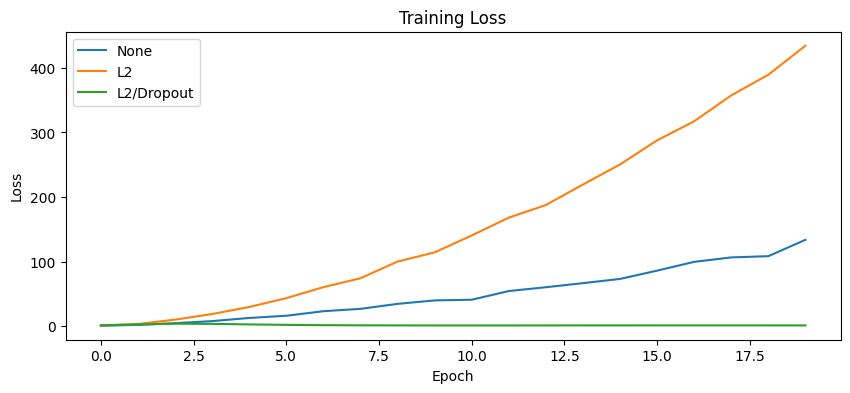

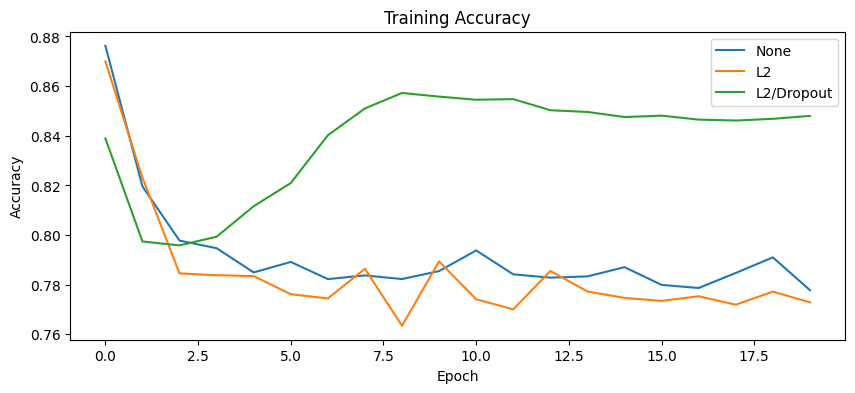

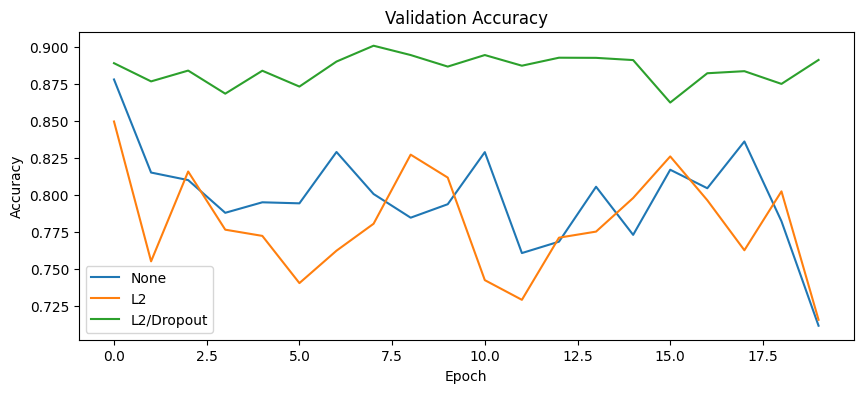

In [8]:

model_history = {"None":history_no_reg.history,
                 "L2":history_l2_reg.history,
                 "L2/Dropout":history_l2_drop_reg.history}

# Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['loss'], label=f'{name}')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Training Accuracy
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['accuracy'], label=f'{name}')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_accuracy'], label=f'{name}')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The plots show that training and validation accuracies are closer after model training. Note that with regularization, the model has not reached convergence and could use more training steps. 

Another option would be to use Early Stopping. This mechanism stops training when validation loss stops improving, preventing overfitting. We can use the EarlyStopping callback. 

In [10]:
model = keras.Sequential([
        keras.layers.Dense(256,activation='relu',input_shape=(784,)),
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(10,activation='softmax') # output layer
    ])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", #keras.optimizers.SGD(0.01)
              metrics=["accuracy"])

early_stopping = keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    patience = 2,
    restore_best_weights = True
)

history_no_reg = model.fit(X_train_mnist,y_train_mnist,
                           epochs=20,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist),
                           callbacks=[early_stopping])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8770 - loss: 0.4362 - val_accuracy: 0.8727 - val_loss: 0.5267
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8360 - loss: 1.2972 - val_accuracy: 0.8520 - val_loss: 1.6164
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8067 - loss: 3.9112 - val_accuracy: 0.7866 - val_loss: 5.7887


Our last regularization step (not include data augmentation), is Batch Normalization. This normalizes activations of each layer to mean = 0 and std = 1, per mini-batch. It stabilizes and speeds up training. Note that we can apply Batch Normalization before the activation function is applied. That is, normalize the weight sum and then apply an activation function on top. You can apply Batch Normalization after activation function as well, but be careful as ReLU can result in a lot of 0s.  

In [11]:
model = keras.Sequential([
        #keras.layers.Dense(256,activation='relu',input_shape=(784,)),
        keras.layers.Dense(256,input_shape=(784,)),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        #keras.layers.Dense(256,activation='relu'),
        keras.layers.Dense(256),
        keras.layers.BatchNormalization(),
        keras.layers.Activation('relu'),
        keras.layers.Dense(10,activation='softmax') # output layer
    ])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", #keras.optimizers.SGD(0.01)
              metrics=["accuracy"])


model.fit(X_train_mnist,y_train_mnist,
                           epochs=5,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9409 - loss: 0.1992 - val_accuracy: 0.9639 - val_loss: 0.1110
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9782 - loss: 0.0742 - val_accuracy: 0.9725 - val_loss: 0.0845
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9853 - loss: 0.0478 - val_accuracy: 0.9778 - val_loss: 0.0651
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9732 - val_loss: 0.0845
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9925 - loss: 0.0245 - val_accuracy: 0.9772 - val_loss: 0.0717


In [12]:
# batch normalization adds additional parameters for the networks to learn
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 812,064 (3.10 MB)

 Trainable params: 270,346 (1.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 540,694 (2.06 MB)

The network now has to learn two new parameters (scale and shift) per node, plus the running running mean and variance but these only need to be tracked not learned. 

Traditionally, the layout for a feed forward neural network should be
1. Define Input Layer
2. Add N Hidden Layers - for each, add L2 regularization, Activation Function, Batch Normalization (before/after activation)
3. Add Dropout between layers (after activation)
4. Define Output Layer with task-depended activation function (softmax for classification, sigmoid for binary, none for regression/linear)
5. Define Optimizer, Loss Function
6. Define Early Stopping parameters